In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
import astropy.units as u
import jax.numpy as jnp

import loss      as wobble_loss
import simulator as wobble_sim
import model     as wobble_model
import dataset   as wobble_data
import plottings as wobble_plot

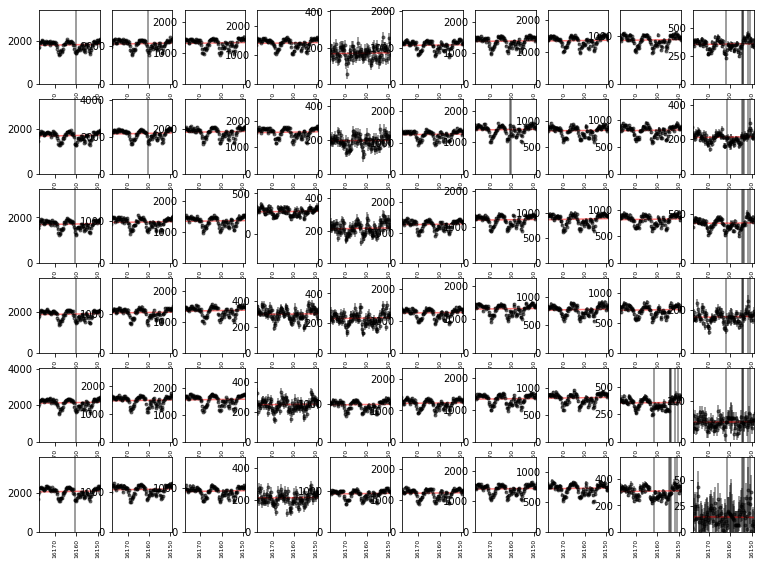

In [2]:
sigma =80
l = 0
r = 3000
# 'data/2M03322788-0658199.fits'
tbl     = at.QTable.read('data/hat-p-20.fits')
dataset = wobble_data.AstroDataset(tbl['flux'],tbl['wavelength']/u.Angstrom,tbl['mask'],tbl['flux_err'])
dataset.interpolate_mask()
filtered = dataset.gauss_filter(sigma=sigma)

wobble_plot.plot_data(dataset.lamb,dataset.flux,dataset.ferr,filtered,xinds=(3000,3100))
plt.show()

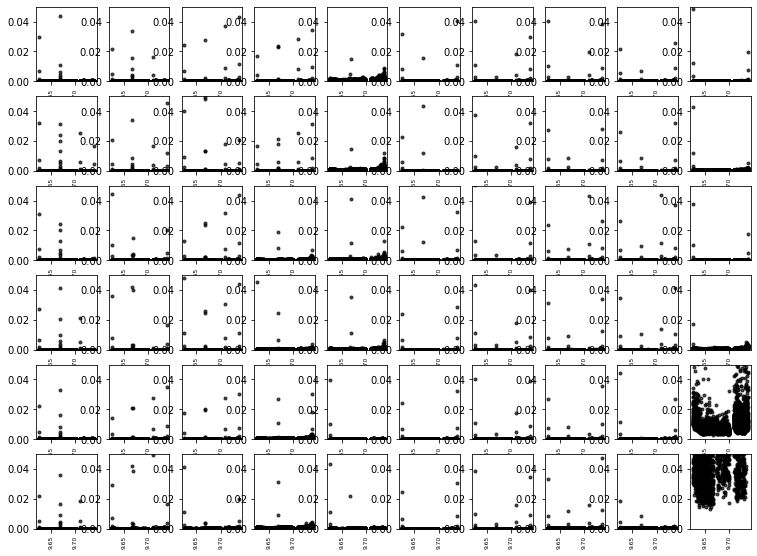

In [10]:
x, y, y_err = dataset.get_xy(filtered)
wobble_plot.plot_error(x,y_err,tbl['mask'])
plt.show()

In [5]:
print(y_err[0,~tbl['mask'][0]])

[1.5004149e-05 1.4874358e-05 1.5448411e-05 ... 4.4462332e-01 1.6305369e+00
 6.6140089e+00]


In [8]:
print(y_err[1,~tbl['mask'][1]].mean())

0.0031777208


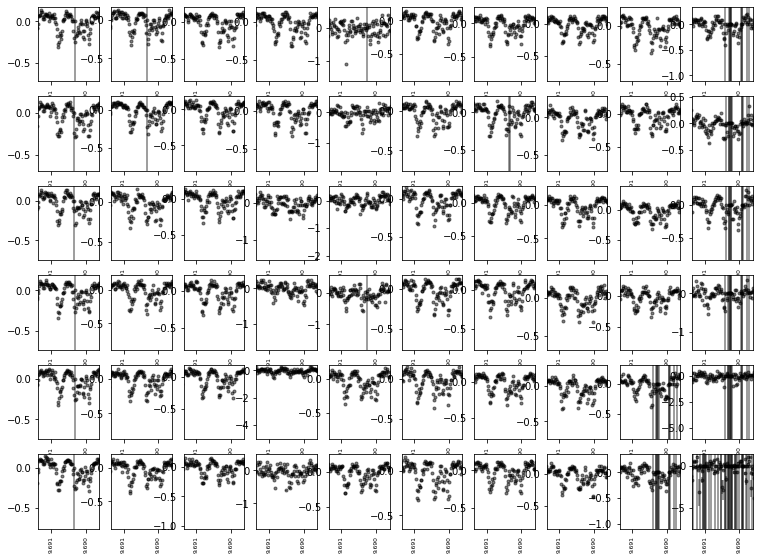

In [9]:
wobble_plot.plot_data(x,y,y_err,xinds=(3000,3100),ypadding=0.02)
plt.show()